<a href="https://colab.research.google.com/github/mccarthyajb/HL-NTAC/blob/main/Build_Hierarchy_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Not connected to a GPU
Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


def plot_cm(cm,title,savename):

  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(roughfine_labels)
  # roughfine_labels)

  # new_orders = np.argsort(roughfine_labels)
  # cm[new_orders][:,new_orders]

  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

In [ ]:
def print_classification_report(predicted_labels, orig_labels, texfilename, caption):

  print(predicted_labels)
  print(orig_labels)


  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  print(classification_report(
        predicted_labels,orig_labels,
        target_names=l_col_list,
        labels=range(0,(len(outcome)))))

  DICT_CLASS_REPORT = classification_report(
        predicted_labels,orig_labels,
        target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )

  print(DICT_CLASS_REPORT)
  macro_f1 = DICT_CLASS_REPORT['macro avg']['f1-score']
  print(macro_f1)

  class_report_df = pd.DataFrame(DICT_CLASS_REPORT)
  class_report_df = class_report_df.round(decimals=2)
  class_report_df = class_report_df.transpose()
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename= basedir + texfilename
  print(class_report_df.to_latex(caption=caption))
  with open(filename, 'w') as f:
    f.write(class_report_df.to_latex(caption=caption))

In [ ]:
def plot_cm_theta(cm,title,savename): # for JSMA theta and gamma values
  # theta=0
  # gamma=0
  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  title = title + ' (Theta=' +str(theta) + ' Gamma=' +str(gamma)+')'
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(roughfine_labels)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

def unique(list1):
  x = np.array(list1)
  return (np.unique(x).tolist)

In [ ]:
def plot_cm_hier(cm,title,labels,savename): # for JSMA theta and gamma values
  # theta=0
  # gamma=0
  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  title = title 
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(labels)
  # import string
  # for i in range(0,len(l_col_list)):
  #   pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
  #   l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

def plot_cm_thetahier(cm,title,labels,savename): # for JSMA theta and gamma values
  # theta=0
  # gamma=0
  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  title = title + ' (Theta=' +str(theta) + ' Gamma=' +str(gamma)+')'
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(labels)
  # import string
  # for i in range(0,len(l_col_list)):
  #   pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
  #   l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=bbee579254e9589cfa710a3f1a25ed312cc32f6d2d497c1acb3c6d151adb8c27
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
Mounted at ./mount
Drive Mounted


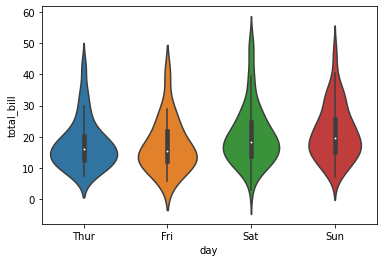

In [ ]:
#!pip install seaborn
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [ ]:
# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df1=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print("Read in df1 - DDoS")

df2=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
print("Read in df2 - PortScan")
    
df3=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Friday-WorkingHours-Morning.pcap_ISCX.csv')
print("Read in df3 - Botnet")
    
df4=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Monday-WorkingHours.pcap_ISCX.csv')
print("Read in df4 - Benign (Normal Human Activities)")
    
df5=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
print("Read in df5 - Infiltration")
    
df6=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
print("Read in df6 - Web Attacks")
    
df7=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Tuesday-WorkingHours.pcap_ISCX.csv')
print("Read in df7 - Brute Force")
    
df8=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Wednesday-workingHours.pcap_ISCX.csv')
print("Read in df8 - DoS/DDoS/HeartBleed")

#frames = [df1, df2, df3, df4]
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
print("Before Concat")
df = pd.concat(frames)

#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

Read in df1 - DDoS
Read in df2 - PortScan
Read in df3 - Botnet
Read in df4 - Benign (Normal Human Activities)
Read in df5 - Infiltration
Read in df6 - Web Attacks
Read in df7 - Brute Force
Read in df8 - DoS/DDoS/HeartBleed
Before Concat


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', 

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [ ]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max
0,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.0,0.113636,0.444444,1.333333e-07,...,9.323764e-07,0.000000,0.000000e+00,0.000519,0.000000,0.000005,1.0,0.0,0.0,0.0
1,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.111968,0.336391,1.016667e-06,...,4.661882e-07,0.000003,9.153974e-09,0.000458,0.003922,0.000000,1.0,0.0,0.0,0.0
2,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.112020,0.339744,5.416666e-07,...,4.661882e-07,0.000003,9.153974e-09,0.000458,0.003922,0.000000,1.0,0.0,0.0,0.0
3,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.112072,0.343137,3.916666e-07,...,4.661882e-07,0.000003,9.153974e-09,0.000488,0.005035,0.000000,1.0,0.0,0.0,0.0
4,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.0,0.113636,0.444444,1.333333e-07,...,9.323764e-07,0.000000,0.000000e+00,0.000504,0.000000,0.000005,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,0.012043,0.004713,0.000000,0.003891,0.026243,0.013102,0.0,0.111925,0.333364,5.379999e-05,...,8.702180e-06,0.000007,2.319007e-07,0.000000,0.000000,0.000014,1.0,0.0,0.0,0.0
692699,0.018065,0.007070,0.000000,0.009268,0.062500,0.031204,0.0,0.112511,0.335391,1.008333e-06,...,6.526635e-06,0.000007,5.522898e-07,0.000000,0.000000,0.000005,1.0,0.0,0.0,0.0
692700,0.000000,0.002609,0.003076,0.000307,0.002072,0.001034,0.0,0.112115,0.339431,4.500000e-07,...,2.408639e-06,0.000003,9.153974e-09,0.015366,0.000015,0.000000,1.0,0.0,0.0,0.0
692701,0.013763,0.005386,0.000000,0.006554,0.044199,0.022067,0.0,0.111921,0.333335,1.248483e-03,...,1.491802e-05,0.000007,3.905696e-07,0.000000,0.000000,0.000023,1.0,0.0,0.0,0.0


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [ ]:
# Output the classes
outcome = df[' Label'].unique()
print(outcome)

Y_attack = df[' Label']
print(Y_attack)

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2827876, dtype: object


#Resample the dataset adjusting for bias

In [ ]:
# Resample
import imblearn
print("imblearn:" + imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# print(Y_class)
print(Y_attack)
x_scaled = np.array(df2)
transformed_label = le.fit_transform(Y_attack)
print(transformed_label)

#define oversampling strategy
print(outcome)
# orig_sampling_strategy = {
#     "BENIGN"                    : 2271320,
#     "DDoS"                      :  128025,
#     'PortScan'                  :  158804, 
#     'Bot'                       :    1956, 
#     'Infiltration'               :      36,
#     'Web Attack � Brute Force'  :    1507, 
#     'Web Attack � XSS'          :     652,
#     'Web Attack � Sql Injection':      21, 
#     'FTP-Patator'               :    7935, 
#     'SSH-Patator'               :    5897, 
#     'DoS slowloris'             :    5796,
#     'DoS Slowhttptest'          :    5499, 
#     'DoS Hulk'                  :  231073, 
#     'DoS GoldenEye'             :   10293, 
#     'Heartbleed'                :      11
# }

over_sampling_strategy = { # Minimum 25
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      25, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      25
}

over = RandomOverSampler(sampling_strategy = over_sampling_strategy)
print("Oversampling...")
x_over, y_over = over.fit_resample(x_scaled, Y_attack)
x_scaled = x_over
Y_attack = y_over

print("Finished oversampling...")

#define undersampling strategy
under = RandomUnderSampler(sampling_strategy = 'not minority')
print("Undersampling...")
x_under, y_under = under.fit_resample(x_scaled, Y_attack)
print("Finished undersampling...")

print(x_under)
print(y_under)
#from now on use undersampled
x_scaled = x_under
Y_class  = y_under

tempdf2 = pd.DataFrame(x_scaled,columns=subset.columns)
templabledf = pd.DataFrame(Y_class,columns=[' Label']) 


df2 = pd.concat([tempdf2, templabledf.reindex(df1.index)], axis=1)
print(df2.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2[' Label'])
transformed_label = le.transform(templabledf[' Label']) # multi-class 
print(transformed_label)
print(df2.columns)

orig_headers = df2.columns





imblearn:0.8.1
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2827876, dtype: object
[0 0 0 ... 0 0 0]
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
Oversampling...
Finished oversampling...
Undersampling...
Finished undersampling...
[[0.         0.00589141 0.00956825 ... 0.00689019 0.         0.00689019]
 [0.0172043  0.00673304 0.         ... 0.         0.         0.        ]
 [0.02150538 0.00841629 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         

In [ ]:
print(df2)
df2.to_csv('mount/My Drive/Colab Notebooks/CICIDS2017/resampledforbalance.csv')


         Fwd Packet Length Min   Fwd Packet Length Mean  \
0                     0.000000                 0.005891   
1                     0.017204                 0.006733   
2                     0.021505                 0.008416   
3                     0.024946                 0.009763   
4                     0.014194                 0.005555   
...                        ...                      ...   
225740                     NaN                      NaN   
225741                     NaN                      NaN   
225742                     NaN                      NaN   
225743                     NaN                      NaN   
225744                     NaN                      NaN   

         Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
0                     0.009568               0.286329                0.000000   
1                     0.000000               0.002867                0.019337   
2                     0.000000               0.0

In [ ]:
# Split data based on identified classes
# df2[' Label'] = df[' Label']
benign = df2[df2[' Label'] == outcome[0]]
ddos = df2[df2[' Label'] == outcome[1]]
portscan = df2[df2[' Label'] == outcome[2]]
bot = df2[df2[' Label'] == outcome[3]]
infiltration = df2[df2[' Label'] == outcome[4]]
webattackbruteforce = df2[df2[' Label'] == outcome[5]]
webattackxxs = df2[df2[' Label'] == outcome[6]]
webattacksqlinjection = df2[df2[' Label'] == outcome[7]]
ftppatator = df2[df2[' Label'] == outcome[8]]
sshpatator = df2[df2[' Label'] == outcome[9]]
dosslowloris = df2[df2[' Label'] == outcome[10]]
dosslowhttptest = df2[df2[' Label'] == outcome[11]]
doshulk = df2[df2[' Label'] == outcome[12]]
dosgoldeneye = df2[df2[' Label'] == outcome[13]]
heartbleed = df2[df2[' Label'] == outcome[14]]

traffictypes = [benign, ddos, portscan ,bot, infiltration,
webattackbruteforce, webattackxxs, webattacksqlinjection,
ftppatator, sshpatator, dosslowloris, dosslowhttptest, doshulk , dosgoldeneye, heartbleed ]

Do Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
import numpy as np
print("Numpy:" + np.__version__)

!pip install adversarial-robustness-toolbox==1.08
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import SaliencyMapMethod
from art.estimators.classification import KerasClassifier
from art.estimators.classification import SklearnClassifier
from art.estimators.classification import EnsembleClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


Numpy:1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 3.4 MB 34.2 MB/s 
     |████████████████████████████████| 25.3 MB 90.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2[' Label'])
Y_class = transformed_label # multi-class 

#Train test split

testSize = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y_class, test_size = testSize, shuffle=True, random_state = 42)


print(x_train.shape)
print(x_test.shape)

num_classes = len(np.unique(y_train))
print("There are "+ str(num_classes) +" distinct classes")
print(np.unique(y_train))


(262, 58)
(113, 58)
There are 15 distinct classes
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
CLASS_TO_TRAIN ="multiclass"
epochs=1600
    
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(np.unique(Y_class))),
        tf.keras.layers.Activation(tf.nn.softmax)
])

print(model.summary())

print("There are " +str(len(x_train)) +" lines in x_train")
  
basedir = "/mount/Notebooks/Classifier/ModelH5s/"
best_model_filename = basedir + CLASS_TO_TRAIN + "-instance_best_model" + ".h5"
    
callbacks = [
  keras.callbacks.ModelCheckpoint(
    best_model_filename, save_best_only=True, monitor="val_loss"
  ),
  keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
  ),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
 
model.compile(optimizer='adam',
            #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
        x_train, y_train, epochs=epochs,
        callbacks=callbacks,
        shuffle=False,
        validation_data=(x_test, y_test),
        verbose=1
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7552      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 15)                975       
                                                                 
 activation (Activation)     (None, 15)                0         
                                                                 
Total params: 16,783
Trainable params: 16,783
Non-trainable params: 0
_________________________________________________________________
None
There are 262 lines in x_train
Train on 262 samples, validate on 113 samples
Epoch 1/1600
262/262 [==============================] - 1s 2ms/sample - loss: 2.7098 - accuracy: 0.095

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


262/262 [==============================] - 0s 236us/sample - loss: 2.6219 - accuracy: 0.2366 - val_loss: 2.5988 - val_accuracy: 0.2566 - lr: 0.0010
Epoch 3/1600
262/262 [==============================] - 0s 195us/sample - loss: 2.5504 - accuracy: 0.2290 - val_loss: 2.5298 - val_accuracy: 0.2301 - lr: 0.0010
Epoch 4/1600
262/262 [==============================] - 0s 251us/sample - loss: 2.4718 - accuracy: 0.2672 - val_loss: 2.4470 - val_accuracy: 0.2301 - lr: 0.0010
Epoch 5/1600
262/262 [==============================] - 0s 197us/sample - loss: 2.3821 - accuracy: 0.3015 - val_loss: 2.3512 - val_accuracy: 0.2655 - lr: 0.0010
Epoch 6/1600
262/262 [==============================] - 0s 190us/sample - loss: 2.2802 - accuracy: 0.3473 - val_loss: 2.2501 - val_accuracy: 0.2832 - lr: 0.0010
Epoch 7/1600
262/262 [==============================] - 0s 192us/sample - loss: 2.1723 - accuracy: 0.3550 - val_loss: 2.1486 - val_accuracy: 0.3009 - lr: 0.0010
Epoch 8/1600
262/262 [=========================

In [ ]:
# Create the ART Classifier
art_classifier = KerasClassifier(model=model, use_logits=False)


In [ ]:
# 0 - 14 labels =       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
OHE_benign =            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0]

targets=[]

for i in range(0,len(x_test)):
  targets.append(OHE_benign)
numpy_targets = np.array(targets)

#Generate FGSM Adversarial Examples

# attack = FastGradientMethod(estimator=art_classifier, eps=0.5)
# print("Generating FGSM")

# x_test_fgsm = attack.generate(x=x_test)
# print(x_test_fgsm)

# Theta = perturbation to each feature
# Gamma = float max fraction of features being perturbed
for theta in ([0.05]):
  for gamma in ([0.02]):

    # attack = SaliencyMapMethod(classifier=art_classifier, theta=0.1, gamma=0.1, batch_size=1,verbose=True) # Theta = Small Perturbation , Gamma = 10% of features

    attack = SaliencyMapMethod(classifier=art_classifier, theta=theta, gamma=gamma, batch_size=1,verbose=True) # Theta = Small Perturbation , Gamma = 10% of features
    print("Starting to Generate untargeted JSMA")
    #x_test_adv = attack.generate(x=x_test, y=oh_target_labels)
    x_test_jsma = attack.generate(x=x_test)
    # print(x_test_jsma)

    print("Starting to Generate Targeted JSMA")

    targeted_benign_x_test_jsma = attack.generate(x=x_test,y=numpy_targets)
    print(f"shape of adversarial examples: {targeted_benign_x_test_jsma.shape}")

    #Keep benign cases

    for i in range(0,len(x_test)):
      if(y_test[i] == 0):
        # x_test_fgsm[i] = x_test[i]
        x_test_jsma[i] = x_test[i]
        targeted_benign_x_test_jsma[i] = x_test[i]


    # Save x_test_jsma 

    # savename='x_test_jsma-' + 'theta-' + str(theta) + 'gamma-'+ str(gamma) +'.npy'
    # basedir='mount/My Drive/Colab Notebooks/Figures/'
    # filename=basedir+savename
    # print(f"Writing file {filename}")
    # np.save(filename, x_test_jsma)

    # savename='targeted_benign_jsma-'+ 'theta-' + str(theta) + 'gamma-'+ str(gamma) +'.npy'
    # basedir='mount/My Drive/Colab Notebooks/Figures/'
    # filename=basedir+savename
    # print(f"Writing file {filename}")
    # np.save(filename, targeted_benign_x_test_jsma)

Starting to Generate untargeted JSMA


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


JSMA:   0%|          | 0/113 [00:00<?, ?it/s]

Starting to Generate Targeted JSMA


JSMA:   0%|          | 0/113 [00:00<?, ?it/s]

shape of adversarial examples: (113, 58)


0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740       NaN
225741       NaN
225742       NaN
225743       NaN
225744       NaN
Name:  Label, Length: 225745, dtype: object
[ 0  0  0 ... 15 15 15]
(375, 58)
(375, 58)
Index([' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length 

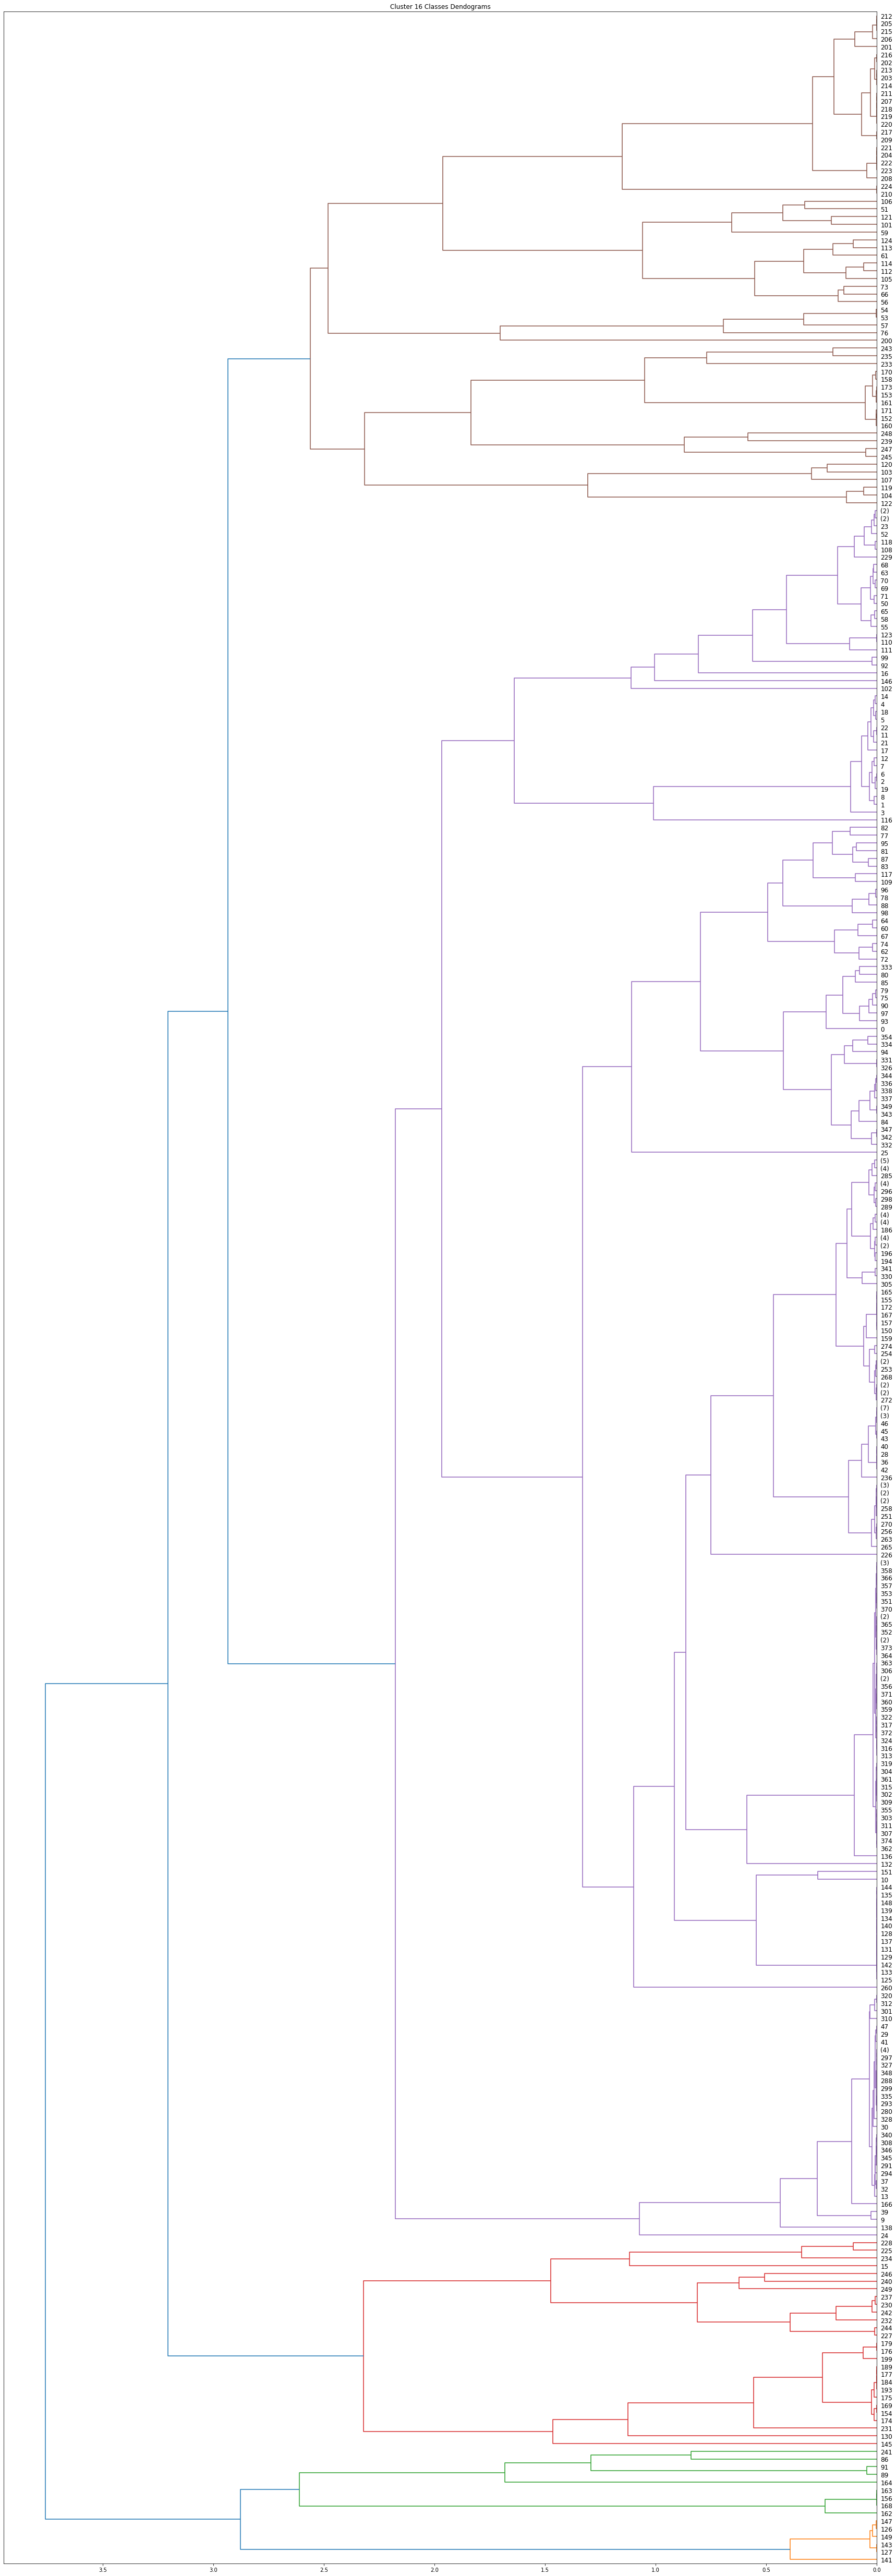

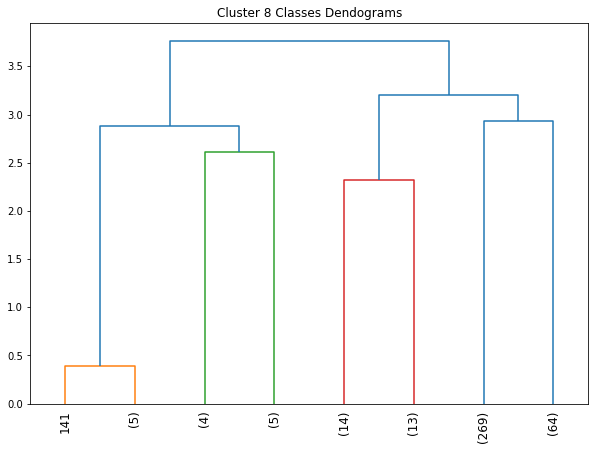

In [ ]:
benign

# First define the leaf label function.
def llf(id):
    if id < 2:
        return str(transformed_label[id])
    else:
        return str(id)

# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
# dendrogram(Z, leaf_label_func=llf, leaf_rotation=90)

# leaf_label_func can also be used together with ``truncate_mode`` parameter,
# in which case you will get your leaves labeled after truncation:
# dendrogram(Z, leaf_label_func=llf, leaf_rotation=90,
          #  truncate_mode='level', p=2)

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [
        model.children_, 
        model.distances_, 
        counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2[' Label'])
templabledf= df2[' Label']
print(templabledf)
transformed_label = le.transform(templabledf) # multi-class 
print(transformed_label)
df2 = df2.drop(columns=[' Label'])

# df2[' Label'] = transformed_label

# Remove NaN and Inf
df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
print(df2.shape)
# Remove columns with all zero values
# df2 = df2.loc[:, (df2 != 0).any(axis=0)]
print(df2.shape)
print(df2.columns)
cluster_columns = df2.columns
# Output table
# print(df2)
X = df2.values
print(X.shape)

# setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) # None)

metrics = [ "manhattan", "euclidean", "minkowski"]

# for metric in metrics:

#   model = AgglomerativeClustering(distance_threshold=0,
#                                   n_clusters=None,
#                                   affinity = metric,
#                                   linkage = "single",
#                                 )

#   model = model.fit(X)
#   # model = model.fit_predict(X)
#   plt.title(f"Hierarchical Clustering Dendrogram\nusing {metric} distance metric")
#   # plot the top three levels of the dendrogram
#   # 
#   plot_dendrogram(model,  leaf_rotation=90, truncate_mode="level", p=3,
#                               leaf_font_size=12, orientation='top')
#   plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#   plt.show()
#   # print(model.labels_)
#   # print(model.children_)
#   # print(len(model.labels_))
#   # print(len(X))

#   # print(model)

#   # for i in range (0,len(model.labels_)):
#   #   print(transformed_label[model.labels_])


print('============')

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []
class13 = []
class14 = []

from collections import defaultdict
  
bottom_layer_labels = (cluster.labels_)

for i in range(0,len(cluster.labels_)):
  # print(f'{i} : ORIG_LABEL : {transformed_label[i]} - {outcome[transformed_label[i]]}; CLUSTER_LABEL: {cluster.labels_[i]}')
  # print(cluster.labels_[i])
  if(int(cluster.labels_[i]) == 0):
    class0.append(transformed_label[i])
  elif(cluster.labels_[i] == 1):
    class1.append(transformed_label[i])
  elif(cluster.labels_[i] == 2):
    class2.append(transformed_label[i])
  elif(cluster.labels_[i] == 3):
    class3.append(transformed_label[i])
  elif(cluster.labels_[i] == 4):
    class4.append(transformed_label[i])
  elif(cluster.labels_[i] == 5):
    class5.append(transformed_label[i])
  elif(cluster.labels_[i] == 6):
    class6.append(transformed_label[i])
  elif(cluster.labels_[i] == 7):
    class7.append(transformed_label[i])
  elif(cluster.labels_[i] == 8):
    class8.append(transformed_label[i])
  elif(cluster.labels_[i] == 9):
    class9.append(transformed_label[i])
  elif(cluster.labels_[i] == 10):
    class10.append(transformed_label[i])
  elif(cluster.labels_[i] == 11):
    class11.append(transformed_label[i])
  elif(cluster.labels_[i] == 12):
    class12.append(transformed_label[i])
  elif(cluster.labels_[i] == 13):
    class13.append(transformed_label[i])
  elif(cluster.labels_[i] == 14):
    class14.append(transformed_label[i])
       
  pass


    # print(class0)
    # print(class1)
    # print(class2)


import scipy.cluster.hierarchy as shc
from matplotlib.colors import rgb2hex, colorConverter

plt.figure(figsize=(30, 90))
plt.title("Cluster 16 Classes Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'),leaf_rotation=0, truncate_mode="level", p=16,
                              leaf_font_size=12, orientation='left')


cluster_idxs = defaultdict(list)
for c, pi in zip(dend['color_list'], dend['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))


cluster_idxs

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

cluster_classes = Clusters()
for c, l in cluster_idxs.items():
    i_l = [dend['ivl'][i] for i in l]
    cluster_classes[c] = i_l

cluster_classes

print(cluster_classes._repr_html_())

plt.savefig('Dendogram-complete-Coarse.png')

plt.figure(figsize=(10, 7))
plt.title("Cluster 8 Classes Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'),leaf_rotation=90, truncate_mode="level", p=2,
                              leaf_font_size=12, orientation='top')
plt.savefig('Dendogram-complete-Fine.png')
  
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)


class0 = []
class1 = []
class2 = []
class3 = []
class4 = []


top_layer_labels = (cluster.labels_)
# print(top_layer_labels)
for i in range(0,len(cluster.labels_)):
  # print(f'{i} : ORIG_LABEL : {transformed_label[i]} - {outcome[transformed_label[i]]}; CLUSTER_LABEL: {cluster.labels_[i]}')
  if(int(cluster.labels_[i]) == 0):
    class0.append(transformed_label[i])
  elif(cluster.labels_[i] == 1):
    class1.append(transformed_label[i])
  elif(cluster.labels_[i] == 2):
    class2.append(transformed_label[i])
  elif(cluster.labels_[i] == 3):
    class3.append(transformed_label[i])
  elif(cluster.labels_[i] == 4):
    class4.append(transformed_label[i])
  
  pass

print("Class0")
print("======")
count = 0
class0bin = np.bincount(np.array(class0))
print(class0bin)
for i in range(0,len (class0 )) :
  if class0[i] == 0:
    count = count +1
print(f"count of zeros: {count}")



print("Class1")
print("======")
print(np.bincount(np.array(class1)))

print("Class2")
print("======")
print(np.bincount(np.array(class2)))

print("Class3")
print("======")
print(np.bincount(np.array(class3)))

print("Class4")
print("======")
print(np.bincount(np.array(class4)))






# =====

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []
class13 = []
class14 = []

for i in range(0,len(cluster.labels_)):
  print(f'{i} : ORIG_LABEL : {transformed_label[i]} - {outcome[transformed_label[i]]}; CLUSTER_LABEL: {cluster.labels_[i]}')
  if(int(transformed_label[i]) == 0):
    class0.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 1):
    class1.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 2):
    class2.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 3):
    class3.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 4):
    class4.append(cluster.labels_[i])

  elif(int(transformed_label[i]) == 5):
    class5.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 6):
    class6.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 7):
    class7.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 8):
    class8.append(cluster.labels_[i])

  elif(int(transformed_label[i]) == 9):
    class9.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 10):
    class10.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 11):
    class11.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 12):
    class12.append(cluster.labels_[i])

  elif(int(transformed_label[i]) == 13):
    class13.append(cluster.labels_[i])
  elif(int(transformed_label[i]) == 14):
    class14.append(cluster.labels_[i])
  
  
  pass

all_classes = [class0, class1, class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12, class13, class14]
print("=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=--=-=-=")
resultdf = pd.DataFrame(index=range(0))

class_count = 0 
for class_name in all_classes:
  tempbinnp = np.bincount(np.array(class_name), minlength=5)
  print(f"Class {class_count} - {outcome[class_count]}: Cluster {np.argmin(tempbinnp)}")
  class_count = class_count + 1
  tempbindf = pd.DataFrame(tempbinnp).transpose()
  frames = [resultdf, tempbindf]
  resultdf = pd.concat(frames)


# resultdf['class'] = outcome
# resultdf['cluster'] = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4',]
# print(resultdf.columns)
resultdf['Class']=outcome
# resultdf.iloc[:, [5,0,1,2,3,4]]
print(resultdf)
print(resultdf.transpose())

print("=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=--=-=-=")
# resultdf.plot.bar
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_context("paper")
sns.color_palette("dark:salmon_r", as_cmap=True)



hier_labels = []
parent_dict = {}
for i in range(0,len(top_layer_labels)):
  hier_labels.append([str(top_layer_labels[i]),str(bottom_layer_labels[i])])
  parent_dict[bottom_layer_labels[i]] = top_layer_labels[i]

print(hier_labels)

from operator import itemgetter
sorted = hier_labels
sorted.sort(key=itemgetter(0,1))
# print(sorted)
# print(hier_labels)

res = set() 
for i in range(0,len(sorted)):
  # print(sorted[i])
  # Extract unique tuples from list(Order Irrespective)
  # using list comprehension + set()

  res.add(str(sorted[i]))

res =list(res)
res.sort()
print("=============================")
print("The Hierarchy Looks like this")
print("=============================")

for i in range(0,len(res)):
  print(res[i])
print("=============================")




  # print(f'{i} : TL: {top_layer_labels[i]} BL: {bottom_layer_labels[i]}')
  # pass

# # Define Hierarchy
# hier_labels = []
# for i in range (0,len(Y_class)):
#   # print(str(Y_class[i]))
#   # print(outcome)
#   if(int(Y_class[i]) == 0): # outcome[0]):
#     hier_labels.append(['Other', 'BENIGN'])

#   elif(int(Y_class[i]) == 1):
#     hier_labels.append(['DoS','DDoS'])

#   elif(int(Y_class[i]) == 2):
#       hier_labels.append(['Penetration','PortScan'])

#   elif(int(Y_class[i]) == 3):
#       hier_labels.append(['Penetration','Bot'])
  
#   elif(int(Y_class[i]) == 4):
#       hier_labels.append(['Penetration','Infiltration'])
  
#   elif(int(Y_class[i]) == 5):
#       hier_labels.append(['BruteForce','WebAttack Brute Force'])
  
#   elif(int(Y_class[i]) == 6):
#       hier_labels.append(['Exploit','XXS'])
#   elif(int(Y_class[i]) == 7):
#       hier_labels.append(['Exploit','SQL Injection'])
#   elif(int(Y_class[i]) == 8):
#       hier_labels.append(['BruteForce','FTP-Patator'])
#   elif(int(Y_class[i]) == 9):
#       hier_labels.append(['BruteForce','SSH-Patator'])
#   elif(int(Y_class[i]) == 10):
#       hier_labels.append(['DoS','DoS slowloris'])
#   elif(int(Y_class[i]) == 11):
#       hier_labels.append(['DoS','DoS Slowhttptest'])
#   elif(int(Y_class[i]) == 12):
#       hier_labels.append(['DoS','DoS Hulk'])
#   elif(int(Y_class[i]) == 13):
#       hier_labels.append(['DoS','Dos GoldenEye'])
#   elif(int(Y_class[i]) == 14):
#       hier_labels.append(['Exploit','Heartbleed'])
print(len(Y_class))
print(len(hier_labels))
print(len(Y_class)-(len(hier_labels)))



print(f"parent of 10 is {parent_dict[10]}")



i = -1
roughcoarse_labels = []
for class_list in [class0, class1, class2, class3, class4]:
  i = i + 1
  myarray = np.array(class_list)
  # print (myarray)
  mycount = np.bincount(myarray)
  # print(mycount)
  
  print(f'class {i} is mostly {np.argmax(mycount)} - {outcome[np.argmax(mycount)]}')
  print('relabel to align wioth expert defined labels')
  roughcoarse_labels.append('(' + str(outcome[np.argmax(mycount)]) + ')')

print(roughcoarse_labels)

i = -1
roughfine_labels = []
for class_list in [class0, class1, class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12, class13, class14]:
  i = i + 1
  myarray = np.array(class_list)
  # print (myarray)
  mycount = np.bincount(myarray)
  # print(mycount)
    
  print(f'class {i} is mostly {np.argmax(mycount)} - {outcome[np.argmax(mycount)]}')
  print('relabel to align with expert defined labels')
  roughfine_labels.append(outcome[np.argmax(mycount)] + ' - [' + str(parent_dict[i]) + '] [' + str(i) +']' )

print(roughfine_labels)


for i in range(0,len(top_layer_labels)):
  # print(f'{i} : TL: {top_layer_labels[i]} BL: {bottom_layer_labels[i]}')

  pass

for i in range(0,len(orig_headers)):
  if(orig_headers[i] in cluster_columns):
    pass
  else:
    print(orig_headers[i])

for i in [184, 180, 189, 191, 183, 179, 188, 177, 195, 197, 194, 345, 338, 131, 17]:
  print(bottom_layer_labels[i])

In [ ]:
from sklearn.model_selection import train_test_split
x_scaled = np.array(df2)

Y_class = bottom_layer_labels # multi-class 

#Train test split

testSize = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y_class, test_size = testSize, shuffle=True, random_state = 42)


print(x_train.shape)
print(x_test.shape)

num_classes = len(np.unique(y_train))
print("There are "+ str(num_classes) +" distinct classes")
print(np.unique(y_train))

from sklearn.neural_network import MLPClassifier

skMLP = MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters



history = skMLP.fit(
        x_train, y_train
)        

result = skMLP.score(x_test, y_test)
print(result)
print("Accuracy: %.2f%%" % (result*100.0))


(262, 58)
(113, 58)
There are 15 distinct classes
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
0.9911504424778761
Accuracy: 99.12%


In [ ]:
predictions = skMLP.predict_proba(x_test)
print(predictions)
rounded_predictions = predictions.round().astype(int)
rounded_prediction = predictions * 100
print(rounded_predictions)
integer_predictions = []

print("-------")
for i in range(0,len(rounded_predictions)):
  arr = []
  for j in range(0,num_classes):

    arr.append(rounded_predictions[i][j]) 
    
  print(arr)
  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_predictions.append(HighestProbabilityClass)

print(integer_predictions)
# print(len(integer_predictions))


# results = model.evaluate(x_test, y_test)

# # print(y_test)
# print(len(y_test))

# print("----- NORMAL test loss, test acc:", results)
# print(predictions)
# OneHotEncoded_y_test = to_categorical(y_test)
# print(OneHotEncoded_y_test)
# print(len(OneHotEncoded_y_test))
# rounded_predictions = predictions.round().astype(int)
# integer_predictions = []
# for i in range(len(rounded_predictions)):
#   print(1)

[[4.77281017e-08 1.65616508e-06 2.82324650e-05 ... 5.09094577e-13
  1.54540544e-07 1.94639844e-08]
 [1.04455383e-07 6.66472617e-06 3.14002767e-04 ... 2.54226519e-12
  4.96874748e-07 1.26976531e-07]
 [2.47214907e-04 3.16092425e-04 1.14122165e-08 ... 3.35174427e-03
  1.99720152e-02 3.86769384e-06]
 ...
 [4.70334580e-08 1.83282574e-06 3.84488163e-05 ... 4.66924163e-13
  1.51530406e-07 2.15724509e-08]
 [1.51856377e-10 7.42762647e-07 1.08409306e-08 ... 1.29000660e-09
  2.07807251e-04 1.30385539e-07]
 [3.31386230e-08 6.84441786e-07 4.81921608e-06 ... 2.78498935e-13
  7.56680905e-08 6.04167429e-09]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
targets = []
classes = transformed_label
#.unique gives the order of appearance and therefore does not sort.
print(classes)
new_order_classes = np.unique(Y_class)
print(new_order_classes)


print(classification_report(
    integer_predictions,
    y_test #,
    # target_names=outcome,
    # labels=range(0,(len(outcome))))
))

print(y_test)
print(outcome)
# print(len(outcome))
count_arr = np.bincount(y_test)
for i in range(0,len(outcome)-1):
  print(i, count_arr[i])


# print_classification_report(integer_predictions,y_test, "SK-MLPOriginal.tex","Multiclass Original Classification Report")

[ 0  0  0 ... 15 15 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         1
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00         5
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         2

    accuracy                           0.99       113
   macro avg       0.96      1.00      0.97       113
weighted avg       1.00      0.99      0.99       113

[ 5  5  6  5  7 10  7  4 10  9  6 10  5  2  5 10  5  6  5 12 1

In [ ]:
# Do the Hierarchical 

# Install conda
!pip install -q condacolab
import condacolab
condacolab.install()

!conda install -c conda-forge hiclass=3.1.6 --yes
# !conda install -c conda-forge hiclass=4.0.6 --yes

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:41
🔁 Restarting kernel...
Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \

In [ ]:
# Load in the x_test_jsma numpy 
savename='x_test_jsma.npy'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
print("Reading file")
x_test_jsma = np.load(filename)
print(x_test_jsma.shape)
print(X.shape)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
# model = MLPClassifier(hidden_layer_sizes=(128,64),activation ='relu',solver='sgd',random_state=1)


original_f1_macros = []
jsma_f1_macros = []

#prepare algorithms to test
models = []
# models.append(('Keras Model',keras_clf))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False))) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters
# models.append(('NB', MultinomialNB())) # Naive Bayes
# models.append(('KNN', KNeighborsClassifier(n_neighbors = 10))) # k Nearest Neighbour
# models.append(('LR', LogisticRegression())) # Logistic Regression
# models.append(('SVC', SVC(C=10, gamma=0.001, probability=True))) # Support Vector Classifier model is tuned using GridSearch (code in seperate file)
# models.append(('DT', tree.DecisionTreeClassifier())) # Decision Tree
# models.append(('RF', RandomForestClassifier(bootstrap=True, n_jobs=2, verbose=True, max_features=20, n_estimators=170, max_depth=None,min_samples_split=5, random_state=7))) # Random Forest
# models.append(('AdaBoost', AdaBoostClassifier()))
# models.append(('XGBoost',XGBClassifier()))
# models.append(('QDA', QuadraticDiscriminantAnalysis())) # Quadratic Discrimination Analysis
# models.append(('HBBC',HistGradientBoostingClassifier())) # Histogram Based Boosting Classifier
# models.append(('LGBM',LGBMClassifier())) # Light Gradient Boosting Machine
    



#evaluate each algorithm
results = []
names = []
for name, current_model in models:
  names.append(name)
  current_model.fit(x_train, y_train)
  orig_predictions = current_model.predict(x_test)
  print(orig_predictions)
  # loss, accuracy = current_model.score(x_test,y_test)
  # print(loss, accuracy)
  if(name=='Kerasy Model'):
    predictions = current_model.predict(x_test)
    print(predictions)
    # rounded_predictions = predictions.round().astype(int)
    # print(rounded_predictions)
    # integer_predictions = []

    # print("-------")
    # for i in range(len(rounded_predictions)):

    #   arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
    #         rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
    #         rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
    #         rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
    #         rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
    #         ]

    #   # print(arr)
    #   HighestProbabilityClass = arr.index(max(arr))
    #   # print(HighestProbabilityClass)
    #   integer_predictions.append(HighestProbabilityClass)

    print(predictions)
    cm = confusion_matrix(y_test,predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')

    jsma_predictions = current_model.predict(x_test_jsma)
    print(jsma_predictions)
    print(jsma_predictions)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')

  else:
    cm = confusion_matrix(y_test,orig_predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')
    DICT = classification_report(
        orig_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    original_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(orig_predictions, y_test, 'class_report_' + str(name) +'-Original.tex', str(name) + 'Classification Report (Original)')

    jsma_predictions = current_model.predict(x_test_jsma)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')
    DICT = classification_report(
        jsma_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    jsma_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(jsma_predictions, y_test, 'class_report_' + str(name) +'-JSMA.tex', str(name) + 'Classification Report (JSMA)')

print("Name, original f1_macro, JSMA f1 macro")
for i in range(0,len(names)):
  print(names[i],original_f1_macros[i],jsma_f1_macros[i])

robustness_df = pd.DataFrame(np.column_stack([names, original_f1_macros, jsma_f1_macros]), 
                               columns=['Model Name', 'Original F1-Score Macro Avg', 'Adversarial F1-Score Macro Avg'])

robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]] = robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]].apply(pd.to_numeric)
rounded_decimals = robustness_df.round(decimals=2)
print(rounded_decimals)
print(rounded_decimals.sort_values('Adversarial F1-Score Macro Avg'))
sorted_df = rounded_decimals.sort_values('Adversarial F1-Score Macro Avg')

print(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))
with open('modeltype_f1_score_amacro_avg.tex', 'w') as f:
  f.write(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))

conditions = []
for i in range (0,len(names)):
  conditions.append('Original')
for i in range (0,len(names)):
  conditions.append('Adversarial')


orig_df = pd.DataFrame(np.column_stack([names, original_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])
adversarial_df = pd.DataFrame(np.column_stack([names, jsma_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])

group_frames = [orig_df,adversarial_df]
group_df = pd.concat(group_frames)
group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
group_df = group_df.sort_values('F1-Score')

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Model Name', y='F1-Score', hue='Conditions', hue_order={'Original','Adversarial'}, data=group_df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('F1-Score Macro Avg (Normal Vs. Adversarial)', fontsize=16)

#add axis titles
plt.xlabel('Model Name')
plt.ylabel('F1-Score Macro Avg')

#rotate x-axis labels
plt.xticks(rotation=90)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
savename='F1-Score-complete-Plot.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')


In [ ]:
parents = [ 0, 1, 2, 3, 4]


for parent in parents:
  layer2_preds =[]
  ground_truth = []
  for i in range(0,len(y_test)):
    if (parent_dict[y_test[i]] == parent):
      layer2_preds.append(integer_predictions[i])
      ground_truth.append(y_test[i])
    else:
      pass
  print("--------------------")
  print(layer2_preds)
  print("--------------------")
  print(ground_truth)
  print("--------------------")
  cm = confusion_matrix(layer2_preds,ground_truth)
  plot_cm(cm, 'Layer2 Children of Parent' + str(parent) + ' (Original)',str(parent) + '-Original.png')





In [ ]:
# Split training and test subsets
from sklearn.model_selection import train_test_split

#Train test split

testSize = 0.3

print(len(x_scaled))
print(len(hier_labels))
x_train, x_test, y_train, y_test = train_test_split(x_scaled, hier_labels, test_size = testSize, shuffle=True, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

print(y_train)

coarse_label = np.empty(len(x_train),dtype=object)
finer_label = np.empty(len(x_train),dtype=object)

for i in range(0,len(y_train)):

  coarse_label[i] = y_train[i][0]
  finer_label[i] = y_train[i][1]

print(coarse_label[0])
print(finer_label[0])




print(y_test)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(coarse_label)
print(coarse_label[0])
coarse_label= le.transform(coarse_label) # multi-class 
print(coarse_label[0])

le.fit(finer_label)
print(finer_label[0])
finer_label= le.transform(finer_label) # multi-class 
print(finer_label[0])

In [ ]:
# Build pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from hiclass import LocalClassifierPerNode, LocalClassifierPerParentNode, LocalClassifierPerLevel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# base_classifier = LogisticRegression(
#     random_state=0,
#     max_iter=10000,
#     n_jobs=1,
# )

base_classifier = MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters

LCPPN = 0
LCPN  = 0 
LCPL  = 0

lcpn = LocalClassifierPerParentNode(
    local_classifier=base_classifier,
    verbose=20,
    n_jobs=1,
)
LCPPN = 1

# lcpn = LocalClassifierPerNode(
#     local_classifier=base_classifier,
#     verbose=20,
#     n_jobs=1,
# )
# LCPN = 1

# lcpn = LocalClassifierPerLevel(
#     local_classifier=base_classifier,
#     verbose=20,
#     n_jobs=1,
# )
# LCPL =1 


pipeline = Pipeline([
    # ('count', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('model', lcpn),
])



# Train classifier
pipeline.fit(x_train, y_train)

In [ ]:
# Predict
predictions = lcpn.predict(x_test)

In [ ]:
def unique(list1):
    x = np.array(list1)
    return (np.unique(x).tolist)

# print(y_test)
# print(predictions)
coarse_ground_truth = []
coarse_predictions = []

fine_ground_truth = []
fine_predictions = []

for i in range(0,len(y_test)):
  coarse_ground_truth.append(y_test[i][0])
  coarse_predictions.append(predictions[i][0])
  fine_ground_truth.append(y_test[i][1])
  fine_predictions.append(predictions[i][1])
print(coarse_ground_truth)
cm = confusion_matrix(coarse_ground_truth,coarse_predictions)
labels = unique(coarse_ground_truth)
print(cm)

parents = [ 0, 1, 2, 3, 4]


for parent in parents:
  layer2_preds =[]
  ground_truth = []
  for i in range(0,len(y_test)):
    
    if (parent_dict[int(y_test[i][1])] == parent):
      layer2_preds.append(fine_predictions[i])
      ground_truth.append(fine_ground_truth[i])
    else:
      pass
  print("--------------------")
  print(layer2_preds)
  print("--------------------")
  print(ground_truth)
  print("--------------------")
  cm = confusion_matrix(layer2_preds,ground_truth)
  plot_cm(cm, 'Layer2 Children of Parent' + str(parent) + ' (Original)',str(parent) + '-Original.png')


if(LCPPN):
  plot_cm_hier(cm,'Clustered Hierarchical MLP (LCPPN) \n Ordinary Traffic \n Coarse Labels\n', [0,1,2,3,4], 'ConfusionMatrix-Clustered-complete-Hier-LCPPN-MLPCoarse.png')
  # plot_cm_hier(cm,'Clustered Hierarchical MLP (LCPPN) \n Ordinary Traffic \n Coarse Labels\n', ["FTP/SSHPatator + DoSsloworis","WebAttacks", "DoS + Heartbleed","Portscan + Bot + Infiltration","Benign + DDoS"], 'ConfusionMatrix-Clustered-Hier-LCPPN-MLPCoarse.png')

  cm = confusion_matrix(fine_ground_truth,fine_predictions)

  

  print(cm)
  plot_cm(cm,'Clustered Hierarchical MLP (LCPPN) \n Ordinary Traffic \n Fine Labels\n','ConfusionMatrix-Clustered-complete-Hier-LCPPN-MLPFine.png')
# elif(LCPN):
# #   plot_cm_thetahier(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPN-MLPCoarse-TARGETED-JSMA.png')

# #   cm = confusion_matrix(fine_ground_truth,fine_predictions)
# #   print(cm)
# #   plot_cm_theta(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPN-MLPFine-TARGETED-JSMA.png')
# # elif(LCPL): 
#   plot_cm_thetahier(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPL-MLPCoarse-TARGETED-JSMA.png')

#   cm = confusion_matrix(fine_ground_truth,fine_predictions)
#   print(cm)
#   plot_cm_theta(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPL-MLPFine-TARGETED-JSMA.png')
# Compute metrics

from sklearn.metrics import f1_score
from hiclass.metrics import f1

# print(y_test.shape)

# print(y_test[0])
# print(y_test[1])

y_test_df = pd.DataFrame(y_test)
# print(y_test)
predictions_df = pd.DataFrame(predictions)


# print(y_test)
# print(predictions[0][0])
# # 
# # print(y_test[:, col])
# print(predictions[:, col])
# predictions = predictions.reshape(113,2)
# print(predictions)

# print(predictions_df[0])
# print(y_test_df[0])
# print(predictions_df[1])




print("Level\tf1_macro\t\tf1_micro\t\tf1_weighted\t\tf1_hierarchical\n")
for col in range(2):
    f1_macro = f1_score(y_test_df[col], predictions_df[col], complete="macro")
    f1_micro = f1_score(y_test_df[col], predictions_df[col], complete="micro")
    f1_weighted = f1_score(y_test_df[col], predictions_df[col], complete="weighted")
    f1_hierarchical = f1(y_test_df[col], predictions_df[col])
    print(f"{col + 1}\t{f1_macro}\t{f1_micro}\t{f1_weighted}\t{f1_hierarchical}\n")

HierMLPNormalTrafficF1 = f1(y_test_df[0], predictions_df[0])
print(HierMLPNormalTrafficF1)

In [ ]:
# # Load in the x_test_jsma numpy 
# savename='x_test_jsma.npy'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# print("Reading file")
# x_test_jsma = np.load(filename)

# # Predict
predictions = lcpn.predict(x_test_jsma)

In [ ]:
# print(y_test)
# print(predictions)
coarse_ground_truth = []
coarse_predictions = []

fine_ground_truth = []
fine_predictions = []

for i in range(0,len(y_test)):
  coarse_ground_truth.append(y_test[i][0])
  coarse_predictions.append(predictions[i][0])
  fine_ground_truth.append(y_test[i][1])
  fine_predictions.append(predictions[i][1])
print(coarse_ground_truth)
cm = confusion_matrix(coarse_ground_truth,coarse_predictions)
labels = unique(coarse_ground_truth)
print(cm)
if(LCPPN):
  plot_cm_thetahier(cm,'Clustered Hierarchical MLP (LCPPN) \n JSMA Samples \n Coarse Labels\n', [0,1,2,3,4], 'ConfusionMatrix-Clustered-complete-Hier-LCPPN-JSMA-Coarse.png')
  # ["FTP/SSHPatator + DoSsloworis","WebAttacks", "DoS + Heartbleed","Portscan + Bot + Infiltration","Benign + DDoS"]
  plot_cm_thetahier(cm,'Clustered Hierarchical MLP (LCPPN) \n JSMA Samples \n Coarse Labels\n', ["FTP/SSHPatator + DoSsloworis","WebAttacks", "DoS + Heartbleed","Portscan + Bot + Infiltration","Benign + DDoS"], 'ConfusionMatrix-Clustered-Hier-LCPPN-JSMA-Coarse.png')
  cm = confusion_matrix(fine_ground_truth,fine_predictions)
  print(cm)
  plot_cm_theta(cm,'Clustered Hierarchical MLP (LCPPN) \n JSMA Samples \n Fine Labels\n','ConfusionMatrix-Clustered-complete-Hier-LCPPN-JSMA-Fine.png')
# elif(LCPN):
# #   plot_cm_thetahier(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPN-MLPCoarse-TARGETED-JSMA.png')

# #   cm = confusion_matrix(fine_ground_truth,fine_predictions)
# #   print(cm)
# #   plot_cm_theta(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPN-MLPFine-TARGETED-JSMA.png')
# # elif(LCPL): 
#   plot_cm_thetahier(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPL-MLPCoarse-TARGETED-JSMA.png')

#   cm = confusion_matrix(fine_ground_truth,fine_predictions)
#   print(cm)
#   plot_cm_theta(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPL-MLPFine-TARGETED-JSMA.png')
# Compute metrics

from sklearn.metrics import f1_score
from hiclass.metrics import f1

# print(y_test.shape)

# print(y_test[0])
# print(y_test[1])

y_test_df = pd.DataFrame(y_test)
# print(y_test)
predictions_df = pd.DataFrame(predictions)


# print(y_test)
# print(predictions[0][0])
# # 
# # print(y_test[:, col])
# print(predictions[:, col])
# predictions = predictions.reshape(113,2)
# print(predictions)

# print(predictions_df[0])
# print(y_test_df[0])
# print(predictions_df[1])




print("Level\tf1_macro\t\tf1_micro\t\tf1_weighted\t\tf1_hierarchical\n")
for col in range(2):
    f1_macro = f1_score(y_test_df[col], predictions_df[col], complete="macro")
    f1_micro = f1_score(y_test_df[col], predictions_df[col], complete="micro")
    f1_weighted = f1_score(y_test_df[col], predictions_df[col], complete="weighted")
    f1_hierarchical = f1(y_test_df[col], predictions_df[col])
    print(f"{col + 1}\t{f1_macro}\t{f1_micro}\t{f1_weighted}\t{f1_hierarchical}\n")

HierMLPNormalTrafficF1 = f1(y_test_df[0], predictions_df[0])
print(HierMLPNormalTrafficF1)